In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset = pd.read_csv('H:\\dataset\\Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [5]:
X, y

(array([[    19,  19000],
        [    35,  20000],
        [    26,  43000],
        [    27,  57000],
        [    19,  76000],
        [    27,  58000],
        [    27,  84000],
        [    32, 150000],
        [    25,  33000],
        [    35,  65000],
        [    26,  80000],
        [    26,  52000],
        [    20,  86000],
        [    32,  18000],
        [    18,  82000],
        [    29,  80000],
        [    47,  25000],
        [    45,  26000],
        [    46,  28000],
        [    48,  29000],
        [    45,  22000],
        [    47,  49000],
        [    48,  41000],
        [    45,  22000],
        [    46,  23000],
        [    47,  20000],
        [    49,  28000],
        [    47,  30000],
        [    29,  43000],
        [    31,  18000],
        [    31,  74000],
        [    27, 137000],
        [    21,  16000],
        [    28,  44000],
        [    27,  90000],
        [    35,  27000],
        [    33,  28000],
        [    30,  49000],
        [   

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 0)



In [7]:
X_train.shape, X_test.shape


((300, 2), (100, 2))

In [8]:
y_train.shape, y_test.shape


((300,), (100,))

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[61  7]
 [ 3 29]]


In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

90.0


In [14]:
import matplotlib.pyplot as plt


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


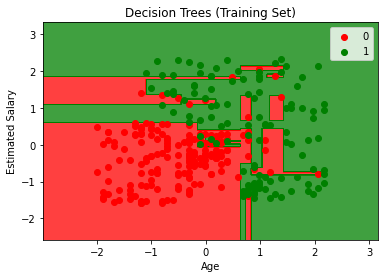

In [15]:
#Visualizing Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01),
                     np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Trees (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


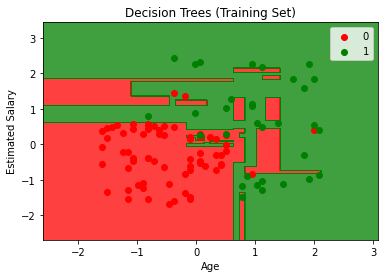

In [16]:
# Visualizing test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01),
                     np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Trees (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()